# Electronic Learning

## У нас есть 4 датасета с данными:
&nbsp;

$\large{\color{Purple}{assessments.csv}}\: —\: содержит\: информацию\: об\: оценках\: в\: модулях-презентациях.\: Обычно\: каждая\: презентация\: включает\: ряд\: оценок,\: за\: которыми\: следует\: заключительный\: экзамен$

* <span style="color:green"><b>code_module</b></span> – идентификационный код модуля (предмета)
* <span style="color:green"><b>code_presentation</b></span> – идентификационный код презентации
* <span style="color:green"><b>id_assessment</b></span> – идентификационный номер ассессмента
* <span style="color:green"><b>assessment_type</b></span> – тип оценки. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam)
* <span style="color:green"><b>date</b></span> – информация об окончательной дате сдачи ассессмента. Рассчитывается как количество дней с момента начала модуля-презентации. Дата начала презентации имеет номер 0 (ноль)
* <span style="color:green"><b>weight</b></span> – вес оценки в %. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%

&nbsp;

$\large{\color{#FF7400}{courses.csv}}\: —\: содержит\: список\: всех\: доступных\: модулей\: (курсов)\: и\: их\: презентации\:$

* <span style="color:blue"><b>code_module</b></span> – идентификационный код модуля (предмета)
* <span style="color:blue"><b>code_presentation</b></span> – идентификационный код презентации
* <span style="color:blue"><b>module_presentation_length</b></span> – продолжительность модуля-презентации в днях

&nbsp;

$\large{\color{#7A0000}{studentAssessment.csv}}\: —\: содержит\: результаты\: ассессментов\: студентов.\: Если\: учащийся\: не\: сдает\: (не\: сдаёт\: работу,\: не\: высылает\: результат)\: домашнюю\: работу,\: результат\: не\: записывается\: в\: ассессмент.\: Заключительные\: экзамены\: не\: принимаются,\: если\: результат\: предварительных\: ассессментов\: отсутствуют\: в\: системе\:$

* <span style="color:#0C5766"><b>id_assessment</b></span> – идентификационный номер ассессмента
* <span style="color:#0C5766"><b>id_student</b></span> – идентификационный номер студента
* <span style="color:#0C5766"><b>date_submitted</b></span> – дата подачи заявки студентом, измеряемая как количество дней с начала презентации модуля
* <span style="color:#0C5766"><b>is_banked</b></span> – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации
* <span style="color:#0C5766"><b>score</b></span> – оценка учащегося в этом ассессменте. Диапазон составляет от 0 до 100. Оценка ниже 40 интерпретируется как несдача

&nbsp;

$\large{\color{#19005D}{studentRegistration.csv}}\: —\: содержит\: информацию\: о\: времени,\: когда\: студент\: зарегистрировался\: для\: участия\: в\: презентации\: модуля$

* <span style="color:#B8491B"><b>code_module</b></span> – идентификационный код модуля (предмета)
* <span style="color:#B8491B"><b>code_presentation</b></span> – идентификационный код презентации
* <span style="color:#B8491B"><b>id_student</b></span> – идентификационный номер студента
* <span style="color:#B8491B"><b>date_registration</b></span> – дата регистрации студента на презентации модуля, это количество дней, измеренное от начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала)
* <span style="color:#B8491B"><b>date_unregistration</b></span> – дата отмены регистрации студента с презентации модуля, это количество дней, отсчитываемое от начала модуля-презентации. У студентов, окончивших курс, это поле остается пустым

## Необходимо выполнить задания, приведенные ниже:

1. Найти сколько студентов успешно сдали только один курс (успешная сдача — это зачёт по курсу на экзамене)

2. Выявить самый сложный и самый простой экзамен: найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*

3. По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом)

4. Выявить самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3)

5. Написать функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов

6. Построить адаптированные под задачу обучения RFM-кластеры студентов. Где R — среднее время сдачи одного ассессмента, F — завершаемость курсов, M — среднее количество баллов, получаемое за экзамен. Подробно описать, как были созданы кластеры. Описание подхода RFM https://medianation.ru/blog/analitika/avtomatizatsiya-rfm-analiza-kak-segmentirovat-klientskuyu-bazu-na-python/

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [1]:
# импортируем все необходимые библиотеки

import requests
from urllib.parse import urlencode
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# прописываем ссылки для чтения файлов csv

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

url_list = dict(assessments = 'https://disk.yandex.ru/d/PBW7aUHGuodFDA',
                courses = 'https://disk.yandex.ru/d/m0Z6QYNT46f9tQ',
                studentAssessment = 'https://disk.yandex.ru/d/lsmdbYB0iM7p3w',
                studentRegistration = 'https://disk.yandex.ru/d/Yse4Y6RJqg_WaA')

download_csv_list = dict()

In [3]:
# получаем загрузочные ссылки

for name_csv, url in url_list.items():
    final_url    = base_url + urlencode(dict(public_key=url))
    response     = requests.get(final_url)
    download_url = response.json()['href']
    download_csv_list.update({name_csv: download_url})

# urlencode                    -> кодируем ссылку (: -> %3A
#                                                  / -> %2F
#                                                  и т.д.)
# base_url                     -> начало публичной ссылки для скачивания
# requests.get(some_url)       -> получаем объект ответа (страницу)
# some_response.json()['href'] -> получаем json ответ, но если 'href', то ссылку на скачивание

In [4]:
# читаем все четыре файла csv

assessments         = pd.read_csv(download_csv_list.get('assessments'))
courses             = pd.read_csv(download_csv_list.get('courses'))
studentAssessment   = pd.read_csv(download_csv_list.get('studentAssessment'))
studentRegistration = pd.read_csv(download_csv_list.get('studentRegistration'))

In [5]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [6]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [7]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [8]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [9]:
# количество строк в каждом датафрейме

print(
    'strings in assessments: ', assessments.shape[0], '\n',
    'strings in courses: ', courses.shape[0], '\n',
    'strings in studentAssessment: ', studentAssessment.shape[0], '\n',
    'strings in studentRegistration: ', studentRegistration.shape[0]
)

strings in assessments:  206 
 strings in courses:  22 
 strings in studentAssessment:  173912 
 strings in studentRegistration:  32593


In [10]:
# типы данных в каждом датафрейме

print(
    'dtypes in assessments: \n', assessments.dtypes, '\n\n',
    'dtypes in courses: \n', courses.dtypes, '\n\n',
    'dtypes in studentAssessment: \n', studentAssessment.dtypes, '\n\n',
    'dtypes in studentRegistration: \n', studentRegistration.dtypes
)

dtypes in assessments: 
 code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object 

 dtypes in courses: 
 code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object 

 dtypes in studentAssessment: 
 id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object 

 dtypes in studentRegistration: 
 code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object


## 1. Найти сколько студентов успешно сдали только один курс (успешная сдача — это зачёт по курсу на экзамене)

In [11]:
# переведем на русский язык некоторые обозначения:


# модуль (module)            -> предмет или курс
#
# презентация (presentation) -> информация об оценках в модулях (ряд оценок)
#
# ассессмент (assessment)    -> оценка за работу, может быть: 1) оценка преподавателя (TMA)
#                                                             2) компьютерная оценка (CMA)
#                                                             3) экзамен по курсу (Exam)
#
# code_presentation          -> состоит из числа (скорее всего год) + что-то значащая буква (год или семестр)
#
# is_banked                  -> результат был перенесен из предыдущего ряда оценок (из предыдущей презентации).
#
# date_submitted             -> кол-во дней от начала срока выполнения задания до отправки задания на проверку
#
# date                       -> дедлайн отправки задания в днях

In [12]:
# объединим таблицы studentAssessment и assessments,
# чтобы была информация по курсам для каждого студента

more = studentAssessment.merge(assessments, how='left', on='id_assessment')

In [13]:
more.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [14]:
# восстановим пропущенные значения сроков сдачи экзаменов

isna_presentation_CCC = more.query('assessment_type == "Exam" \
                                    & date.isna() \
                                    & code_module == "CCC"') \
                            .code_presentation \
                            .unique()

isna_presentation_DDD = more.query('assessment_type == "Exam" \
                                    & date.isna() \
                                    & code_module == "DDD"') \
                            .code_presentation \
                            .unique()

In [15]:
days_DDD = courses.query('code_presentation in @isna_presentation_DDD and code_module == "DDD"')

days_CCC = courses.query('code_presentation in @isna_presentation_CCC and code_module == "CCC"')

In [16]:
days_DDD

,code_module,code_presentation,module_presentation_length
9,DDD,2014J,262


In [17]:
days_CCC

,code_module,code_presentation,module_presentation_length
6,CCC,2014J,269
7,CCC,2014B,241


In [18]:
index_DDD_2014J = more.query('code_module == "DDD" and \
                              code_presentation == "2014J" and \
                              assessment_type == "Exam"').index

index_CCC_2014J = more.query('code_module == "CCC" and \
                              code_presentation == "2014J" and \
                              assessment_type == "Exam"').index

index_CCC_2014B = more.query('code_module == "CCC" and \
                              code_presentation == "2014B" and \
                              assessment_type == "Exam"').index

In [19]:
more.loc[index_DDD_2014J, 'date'] = 262
more.loc[index_CCC_2014J, 'date'] = 269
more.loc[index_CCC_2014B, 'date'] = 241

In [20]:
# корректно перенести данные студентов с флагами is_banked не получится
# поэтому исключим их из анализа

banked_students = more.query('is_banked == 1').id_student
more = more.query('id_student not in @banked_students').reset_index().drop(columns='index')

In [21]:
# посмотрим, по каким модулям вообще сдавали экзамены

exam_courses = more.query('assessment_type == "Exam"') \
                   .code_module \
                   .unique()

exam_courses

array(['CCC', 'DDD'], dtype=object)

In [22]:
# посмотрим, по каким презентациям сдавали экзамены

code_presentation_CCC = more.query('code_module == "CCC" & assessment_type == "Exam"') \
                            .code_presentation \
                            .unique()

code_presentation_DDD = more.query('code_module == "DDD" & assessment_type == "Exam"') \
                            .code_presentation \
                            .unique()

print('code_presentation_CCC: ', code_presentation_CCC, '\n', 'code_presentation_DDD: ', code_presentation_DDD)

code_presentation_CCC:  ['2014B' '2014J'] 
 code_presentation_DDD:  ['2013B' '2013J' '2014B' '2014J']


In [23]:
more['pass'] = True
more['have_exam'] = False

for i in range(len(more.id_student)):
    
    if more.loc[i, 'score'] == np.nan or (more.loc[i, 'score'] < 40): 
        more.loc[i, 'pass'] = False           # создаем список флагов, в котором будут учтены,
                                              # предварительные ассессменты по презентациям 
                                              # курсов CCC и DDD, а также оценки ниже 40 баллов
    
    if more.loc[i, 'assessment_type'] == 'Exam': # по каждой презентации был один экзамен,
        more.loc[i, 'have_exam'] = True          # в дальнейшем это пригодится выбрасывания строк, не имеющих 
                                                 # данных по экзаменам

In [24]:
def multi(mult_list):       # функция для перемножения всех чисел в агрегатном списке
    num = 1
    for elem in mult_list:
        num *= elem
    return num

In [25]:
more.query('code_module in @exam_courses') \
    .groupby(['code_module', 'code_presentation', 'id_student']) \
    .agg({'pass': multi, 'have_exam': 'sum'}) \
    .rename(columns={'pass': 'flag_pass'}) \
    .reset_index() \
    .query('have_exam == 1') \
    .groupby('id_student') \
    .agg({'flag_pass': 'sum'}) \
    .value_counts()

# 1 экзамен успешно сдали 3085

flag_pass
1            3085
0            1248
2             217
dtype: int64

## 2. Выявить самый сложный и самый простой экзамены

In [26]:
# нужно найти курсы и экзамены, которые обладают самой низкой и самой высокой завершаемостью*
# *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
#
# здесь нужно учитывать предварительные ассессменты студентов:
# критерии успешного экзамена: 1) >= 40 баллов
#                              2) результаты предварительных ассессментов присутствуют в системе
#                              3) все остальные ассессменты сданы на 40 и более баллов

In [27]:
comletion_of_presentation = more.query('code_module in @exam_courses') \
                                .groupby(['code_module', 'code_presentation', 'id_student']) \
                                .agg({'pass': multi, 'have_exam': 'sum'}) \
                                .rename(columns={'pass': 'flag_pass'}) \
                                .reset_index() \
                                .query('have_exam == 1') \
                                .groupby(['code_module', 'code_presentation']) \
                                .agg({'flag_pass': ['sum', 'count']}) \
                                .rename(columns={'sum': 'passed_exams', 'count': 'total_attempts'}) \
                                .flag_pass \

comletion_of_presentation['completion'] = 100 * (comletion_of_presentation['passed_exams'] /
                                                    comletion_of_presentation['total_attempts'])

comletion_of_presentation.sort_values(by='completion', ascending=False)

# самый простой экзамен в курсе CCC презентации 2014J
# самый сложный экзамен в курсе DDD презентации 2013B

passed_exams  total_attempts  completion
code_module code_presentation                                          
CCC         2014J                       878            1151   76.281494
DDD         2014J                       696             921   75.570033
CCC         2014B                       562             746   75.335121
DDD         2013J                       669             950   70.421053
            2014B                       355             511   69.471624
            2013B                       359             594   60.437710

In [28]:
comletion_of_courses = more.query('code_module in @exam_courses') \
                           .groupby(['code_module', 'code_presentation', 'id_student']) \
                           .agg({'pass': multi, 'have_exam': 'sum'}) \
                           .rename(columns={'pass': 'flag_pass'}) \
                           .reset_index() \
                           .query('have_exam == 1') \
                           .groupby(['code_module']) \
                           .agg({'flag_pass': ['sum', 'count']}) \
                           .rename(columns={'sum': 'passed_exams', 'count': 'total_attempts'}) \
                           .flag_pass \

comletion_of_courses['completion'] = 100 * (comletion_of_courses['passed_exams'] /
                                                comletion_of_courses['total_attempts'])

comletion_of_courses.sort_values(by='completion', ascending=False)

# завершаемости курсов

,passed_exams,total_attempts,completion
code_module,,,
CCC,1440,1897,75.909331
DDD,2079,2976,69.858871


## 3. По каждому предмету определить средний срок сдачи экзаменов

In [29]:
# под сдачей понимаем последнее успешное прохождение экзамена студентом

# в задании не сказано, с какого момента отсчитывать
# время отправки задания экзамена, поэтому возьмем
# промежуток от начала презентации

In [30]:
# для каждого экзамена найдем среднее date_submitted
# с учетом критериев успешного прохождения

exam_average_term = more.query('code_module in @exam_courses') \
                            .groupby(['code_module', 'code_presentation', 'id_student']) \
                            .agg({'pass': multi, 'have_exam': 'sum'}) \
                            .rename(columns={'pass': 'flag_pass'}) \
                            .reset_index() \
                            .query('flag_pass == True & have_exam == 1')

exam_average_term = exam_average_term.merge(more.query('assessment_type == "Exam"')[['date_submitted',
                                                                                         'code_module',
                                                                                         'code_presentation',
                                                                                         'id_student']],
                                                 on=['code_module',
                                                    'code_presentation',
                                                    'id_student'],
                                                 how='left')

In [31]:
# среднее время успешной сдачи по каждому курсу

exam_average_term.groupby('code_module') \
                 .agg({'date_submitted': 'mean'}) \
                 .rename(columns={'date_submitted': 'mean_date_submitted'})

,mean_date_submitted
code_module,
CCC,239.432639
DDD,238.206830


In [32]:
# среднее время успешной сдачи по каждой презентации

exam_average_term.groupby('code_presentation') \
                 .agg({'date_submitted': 'mean'}) \
                 .rename(columns={'date_submitted': 'mean_date_submitted'})

,mean_date_submitted
code_presentation,
2013B,230.186630
2013J,239.454410
2014B,232.896401
2014J,243.721093


## 4. Выявить самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3)

In [33]:
# посмотрим, у каких студентов нет информации о дате регистрации

registration_NaN = studentRegistration.query('date_registration.isna()').id_student

In [34]:
studentRegistration.query('id_student in @registration_NaN') \
                   .sort_values(by='id_student').head(10)

# видим, что у некоторых студентов нет даты регистрации,
# но есть дата отмены регистрации
# непонятно, как это получилось
# возможно, они зарегистрировались оффлайн
# их учитывать мы не будем

,code_module,code_presentation,id_student,date_registration,date_unregistration
2538,BBB,2013J,57369,NaN,-1.0
22335,FFF,2013B,107955,NaN,-40.0
13135,DDD,2013B,128965,NaN,-24.0
14477,DDD,2013J,128965,-145.0,NaN
14556,DDD,2013J,250456,NaN,-40.0
26333,FFF,2014B,323688,NaN,-107.0
2759,BBB,2013J,342678,NaN,-33.0
10888,CCC,2014J,394791,-64.0,NaN
8975,CCC,2014B,394791,NaN,-61.0
13503,DDD,2013B,464615,NaN,-116.0


In [35]:
top_3_registration = studentRegistration.query('date_registration.isna() == False') \
                                        .groupby('code_module') \
                                        .agg({'date_registration': 'count'}) \
                                        .rename(columns={'date_registration': 'all_registrations'})

In [36]:
top_3_registration['all_outflow'] = studentRegistration.query('date_unregistration.isna() == False & \
                                                               date_registration.isna() == False') \
                                                       .groupby('code_module') \
                                                       .agg({'date_unregistration': 'count'}) \
                                                       .rename(columns={'date_unregistration': 'all_outflow'})

In [37]:
top_3_registration['outflow_percent'] = (top_3_registration['all_outflow'] /
                                        top_3_registration['all_registrations'] * 100)

In [38]:
top_3_registration.sort_values(by='outflow_percent')

# топ-3 по регистрации на курс это BBB, FFF, DDD 
# топ-3 по оттоку с курса это CCC, DDD, FFF

,all_registrations,all_outflow,outflow_percent
code_module,,,
GGG,2534,289,11.404893
AAA,748,126,16.844920
EEE,2932,716,24.420191
BBB,7900,2369,29.987342
FFF,7751,2370,30.576700
DDD,6257,2223,35.528208
CCC,4426,1940,43.831902


## 5. Написать функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов

In [39]:
# суть когортного анализа — объединение клиентов (пользователей, посетителей)
# в группы по одинаковым характеристикам или атрибутам и отслеживание их поведения во времени

In [40]:
def cohort_analysis(data,
                    groupby_list: list,
                    agg_dict: dict,
                    colors='inferno',
                    caption='Cohort analysis'):
    
    """
    Функция строит когортный анализ от агрегатных функций, переданных в функцию.
    
    Описание аргументов:
    
        data                -> датафрейм
        groupby_list        -> список столбцов, по которым будет вестись группировка
        agg_dict            -> словарь из столбцов и агрегатых функций
        colors              -> цветовая схема
        caption             -> надпись когортной таблицы
    """
        
    cohort = data.groupby(groupby_list) \
                 .agg({list(agg_dict.keys())[0]: 'count'}) \
                 .rename({list(agg_dict.keys())[0]: 'for_merge'}) \
                 .reset_index()
    
    stacked_list = []
    
    for agg_column, agg_func in agg_dict.items():
        
        if agg_func == 'completion':
    
            cohort_completion = data.groupby(groupby_list) \
                                    .agg({agg_column: ['sum', 'count']}) \
                                    .rename(columns={'sum': 'successful','count': 'total'})[agg_column]
        
            cohort_completion[agg_func] = (100 * cohort_completion.successful /
                                           cohort_completion.total)
              
            cohort_completion = cohort_completion.reset_index()    
        
            num_strings = data.groupby(groupby_list[-2]) \
                                  .agg({agg_column: 'count'}) \
                                  .rename(columns={agg_column: 'strings'}) \
                                  .reset_index()

            cohort_completion = cohort_completion.merge(num_strings, on=groupby_list[-2], how='left')

            cohort_completion['period_percentage'] = (100 * cohort_completion.query('completion.isna() == False')['total'] / 
                                                      cohort_completion['strings'])
            
            cohort = cohort_completion.merge(cohort, on=groupby_list, how='inner')
            stacked_list.append(agg_func)
            stacked_list.append('period_percentage')
    
        else:
        
            cohort_other_func = data.groupby(groupby_list) \
                                    .agg({agg_column: agg_func}) \
                                    .rename(columns={agg_column: agg_column + '_' + agg_func}) \
                                    .reset_index()
            
            cohort = cohort_other_func.merge(cohort, on=groupby_list, how='left')
            stacked_list.append(agg_column + '_' + agg_func)
        
    cohort_data = pd.DataFrame(cohort.set_index(groupby_list)[stacked_list].stack())
    cohort_data = cohort_data.unstack(level=groupby_list[-1])  
    cohort_data = cohort_data.rename(columns={0: 'Periods'})
    cohort_data.columns.names = ['', 'Params']
        
    cohort_table = (cohort_data.style
                               .set_caption(caption)             # добавляем подпись
                               .background_gradient(cmap=colors) # раскрашиваем ячейки по столбцам
                               .highlight_null('white')          # делаем белый фон для значений NaN
                               .format('{:,.2f}', na_rep=""))    # числа форматируем как проценты,
                                                                 # NaN заменяем на пустоту
        
    return cohort_table

### 5.1 Когда когорты -> курсы, а периоды -> презентации

In [41]:
exam_average_term.head()

,code_module,code_presentation,id_student,flag_pass,have_exam,date_submitted
0,CCC,2014B,29764,True,1,230
1,CCC,2014B,29820,True,1,230
2,CCC,2014B,42638,True,1,230
3,CCC,2014B,46605,True,1,230
4,CCC,2014B,49119,True,1,234


In [42]:
cohort_completion = more.query('code_module in @exam_courses') \
                        .groupby(['code_module', 'code_presentation', 'id_student']) \
                        .agg({'pass': multi, 'have_exam': 'sum'}) \
                        .rename(columns={'pass': 'flag_pass'}) \
                        .reset_index() \
                        .query('have_exam >= 1')

In [43]:
# возьмем параметры для построения когортного анализа

first_mean_data                = exam_average_term
first_mean_groupby_list        = ['code_module', 'code_presentation']
first_mean_agg_dict            = {'date_submitted': 'mean'}

In [44]:
# презентация с самыми долгими средними сроками сдачи курсов: 2014J

cohort_analysis(first_mean_data,
                first_mean_groupby_list,
                first_mean_agg_dict)

In [45]:
first_completion_data                = cohort_completion
first_completion_groupby_list        = ['code_module', 'code_presentation']
first_completion_agg_dict            = {'flag_pass': 'completion'}

In [46]:
# презентация с самой низкой завершаемостью: 2013B

cohort_analysis(first_completion_data,
                first_completion_groupby_list,
                first_completion_agg_dict)

## 6. Построить адаптированные под задачу обучения RFM-кластеры студентов. Подробно описать, как были созданы кластеры

In [47]:
# В RFM: R — среднее время сдачи одного ассессмента,
#        F — завершаемость курсов,
#        M — среднее количество баллов, получаемое за экзамен.
#
# Разобъем каждую "букву" еще на три подгруппы с учетом того, что один студент
# может сдавать более 1 экзамена:
#
#        R = 1 -> просрочили задание более, чем на 3 дня
#          = 2 -> просрочили задание не более, чем на 3 дня 
#          = 3 -> задание выполнено до дедлайна             
#
#        F = 1 -> завершаемость 0%
#          = 2 -> завершаемость 50% и более (до 99%)
#          = 3 -> завершаемость 100%
#
#        M = 1 -> до 40 баллов (плохой результат)
#          = 2 -> от 40 до 80 (хороший результат)
#          = 3 -> больше 80 (отличный результат)
#

## 6.1 Построение подгрупп для R - среднего времени сдачи одного ассессмента

In [48]:
# Будем использовать формулу для расчета:
# среднее время сдачи одного ассессмента = дата_срока_сдачи - дата_отправки_задания

# Затем найдем среднее для каждого студента

In [49]:
# есть даты сдачи с отрицательными числами
# преобразуем их в 0

index_ds_0 = more.query('date_submitted < 0 and code_module in @exam_courses').index
more.loc[index_ds_0, 'date_submitted'] = 0

In [50]:
more['diff_day'] = more['date'] - more['date_submitted']

In [51]:
rfm_clasters = more.query('code_module in @exam_courses')\
                   .groupby(['id_student']) \
                   .agg({'pass': multi, 'have_exam': 'sum', 'diff_day':'mean'}) \
                   .reset_index() \
                   .rename(columns={'diff_day': 'mean_diff_day'}) \
                   .reset_index() \
                   .drop(columns='index') \
                   .query('have_exam >= 1')

In [52]:
rfm_clasters.head()

,id_student,pass,have_exam,mean_diff_day
0,23698,True,1,1.888889
1,24213,True,1,-1.857143
4,27116,True,1,2.000000
7,28046,False,1,2.714286
9,28787,False,1,2.600000


In [53]:
# Разобьем студентов на группы в зависимости от их mean_diff_day

rfm_clasters['r'] = pd.cut(rfm_clasters.mean_diff_day,
                           [-1000, -4, -1, 1000],
                           labels=['1', '2', '3'])

In [54]:
rfm_clasters.head()

,id_student,pass,have_exam,mean_diff_day,r
0,23698,True,1,1.888889,3
1,24213,True,1,-1.857143,2
4,27116,True,1,2.000000,3
7,28046,False,1,2.714286,3
9,28787,False,1,2.600000,3


In [55]:
rfm_clasters.groupby('r').agg({'id_student': 'count'})

,id_student
r,
1,64
2,337
3,4149


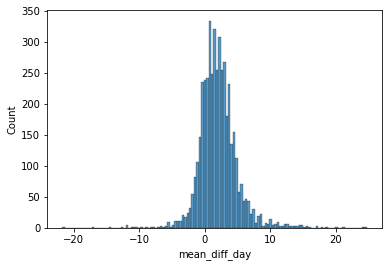

In [56]:
sns.histplot(data=rfm_clasters, x='mean_diff_day')

## 6.2 Построение подгрупп для F - завершаемости курсов

In [57]:
# Находим завершаемость

f_clasters = more.query('code_module in @exam_courses') \
                 .groupby(['id_student', 'code_module', 'code_presentation']) \
                 .agg({'pass': multi, 'have_exam': 'sum'}) \
                 .rename(columns={'pass': 'flag_pass'}) \
                 .reset_index() \
                 .query('have_exam >= 1') \
                 .groupby(['id_student']) \
                 .agg({'flag_pass': ['sum', 'count']}) \
                 .rename(columns={'sum': 'passed_exams', 'count': 'total_attempts'}) \
                 .flag_pass \
                 .reset_index()

f_clasters['completion'] = 100 * (f_clasters['passed_exams'] /
                                  f_clasters['total_attempts'])

In [58]:
f_clasters.head()

,id_student,passed_exams,total_attempts,completion
0,23698,1,1,100.0
1,24213,1,1,100.0
2,27116,1,1,100.0
3,28046,0,1,0.0
4,28787,0,1,0.0


In [59]:
rfm_clasters = rfm_clasters.merge(f_clasters[['id_student', 'completion']], on='id_student', how='left')

In [60]:
# Разбиваем на f кластеры

rfm_clasters['f'] = pd.cut(rfm_clasters.completion,
                           [-1, 49, 89, 100],
                           labels=['1', '2', '3'])

In [61]:
rfm_clasters.head()

,id_student,pass,have_exam,mean_diff_day,r,completion,f
0,23698,True,1,1.888889,3,100.0,3
1,24213,True,1,-1.857143,2,100.0,3
2,27116,True,1,2.000000,3,100.0,3
3,28046,False,1,2.714286,3,0.0,1
4,28787,False,1,2.600000,3,0.0,1


In [62]:
rfm_clasters.groupby('f') \
            .agg({'id_student': 'count'})

,id_student
f,
1,1248
2,80
3,3222


## 6.3 Построение подгрупп для F - среднее количество баллов, получаемое за экзамен

In [63]:
# Находим среднее значение баллов за экзамен

m_clasters = more.query('code_module in @exam_courses') \
                 .groupby(['id_student', 'code_module', 'code_presentation']) \
                 .agg({'have_exam': 'sum'}) \
                 .reset_index() \
                 .query('have_exam >= 1') \
                 .merge(more.query('assessment_type == "Exam"')[['id_student', 'score']], 
                        on='id_student',
                        how='left') \
                 .groupby('id_student') \
                 .agg({'score': 'mean'}) \
                 .rename(columns={'score': 'mean_exam_score'}) \
                 .reset_index()

In [64]:
m_clasters

,id_student,mean_exam_score
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0
...,...,...
4545,2694886,69.0
4546,2694933,73.0
4547,2695608,73.0
4548,2697181,80.0


In [65]:
rfm_clasters = rfm_clasters.merge(m_clasters, on='id_student', how='left')

In [66]:
# Разбиваем на m кластеры

rfm_clasters['m'] = pd.cut(rfm_clasters.mean_exam_score,
                           [-1, 39, 79, 100],
                           labels=['1', '2', '3'])

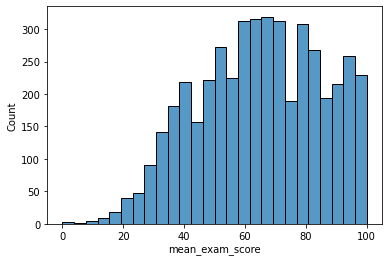

In [67]:
sns.histplot(data=rfm_clasters, x='mean_exam_score')

In [68]:
rfm_clasters['rfm'] = ''

## 6.4 Построение rfm-кластеров

In [69]:
# Разбиваем на rfm кластеры

for i in range(len(rfm_clasters.r)):
    rfm_clasters.loc[i, 'rfm'] = rfm_clasters.loc[i, 'r'] + rfm_clasters.loc[i, 'f'] + rfm_clasters.loc[i, 'm']

In [70]:
rfm_clasters.groupby('rfm') \
            .agg({'id_student': 'count'}) \
            .rename(columns={'id_student': 'student_group'}) \
            .sort_values(by='student_group')

,student_group
rfm,
121,1
221,1
222,3
321,3
323,4
133,4
213,5
111,15
132,20


In [71]:
rfm_clasters.head()

,id_student,pass,have_exam,mean_diff_day,r,completion,f,mean_exam_score,m,rfm
0,23698,True,1,1.888889,3,100.0,3,80.0,3,333
1,24213,True,1,-1.857143,2,100.0,3,58.0,2,232
2,27116,True,1,2.000000,3,100.0,3,96.0,3,333
3,28046,False,1,2.714286,3,0.0,1,40.0,2,312
4,28787,False,1,2.600000,3,0.0,1,44.0,2,312
